# Data Pre-Processing

#### Import Packages and CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"indian_liver_patient.csv")
# Print shape of dataset
print(df.shape)

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


(583, 11)


## Data Cleaning

### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

#### Check Null Values

In [2]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [3]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Albumin_and_Globulin_Ratio 0.68611 % missing values


In [4]:
features_with_na

['Albumin_and_Globulin_Ratio']

* ****We can see that there are 4 null values in the Albumin and Globulin Ratio column.****
### Filling null values

Let us fill these null values by imputing the mean of that column.

In [5]:
mean_ratio = df['Albumin_and_Globulin_Ratio'].mean()
mean_ratio

0.9470639032815201

In [6]:
df = df.fillna(mean_ratio)

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### 3.2 Other Data Cleaning steps

**Handling Duplicates**

In [8]:
df.duplicated().sum()

13

* **No Duplicates in the dataset**

**Remove Albumin_and_Globulin_Ratio,Aspartate_Aminotransferase from the dataset as it cannot used in Model Training**

In [9]:
df = df.drop(['Albumin_and_Globulin_Ratio', 'Aspartate_Aminotransferase'], axis = 1)
df.rename(columns = {'Dataset':'liver_disease_YN'}, inplace =True)

# Feature Engineering

## Feature Extraction

In [10]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,liver_disease_YN
0,65,Female,0.7,0.1,187,16,6.8,3.3,1
1,62,Male,10.9,5.5,699,64,7.5,3.2,1
2,62,Male,7.3,4.1,490,60,7.0,3.3,1
3,58,Male,1.0,0.4,182,14,6.8,3.4,1
4,72,Male,3.9,2.0,195,27,7.3,2.4,1


In [11]:
# # importing date class from datetime module
# from datetime import date
  
# # creating the date object of today's date
# todays_date = date.today()
# current_year= todays_date.year

**Subtract current year with year of estab to get company's age**

In [12]:
#df['company_age'] = current_year-df['yr_of_estab']

In [13]:
#df.head()

In [14]:
#df.drop('yr_of_estab', inplace=True, axis=1)

### Type of Features

**Numeric Features**

In [15]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 8


**Categorical Features**

In [16]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 1


**Discrete features**

In [17]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


**Continuous Features**

In [18]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 7


#### Feature encoding theTarget feature.

In [19]:


## Original dataframe has 1 & 2 encoding for whther a subject has liver disease or not, respecively.
## I will change this into a binary 0 & 1 feature
target_replace_dict = {1:1, 2:0}
df['liver_disease_YN'].replace(target_replace_dict, inplace = True)


In [20]:
df.tail(2)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,liver_disease_YN
581,31,Male,1.3,0.5,184,29,6.8,3.4,1
582,38,Male,1.0,0.3,216,21,7.3,4.4,0


### Split X and Y

* **Split Dataframe to X and y**
* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “Case_Status” column.**


In [21]:
X = df.drop('liver_disease_YN', axis=1)
y = df['liver_disease_YN']

In [22]:
y.tail()

578    0
579    1
580    1
581    1
582    0
Name: liver_disease_YN, dtype: int64

## Feature Transformation

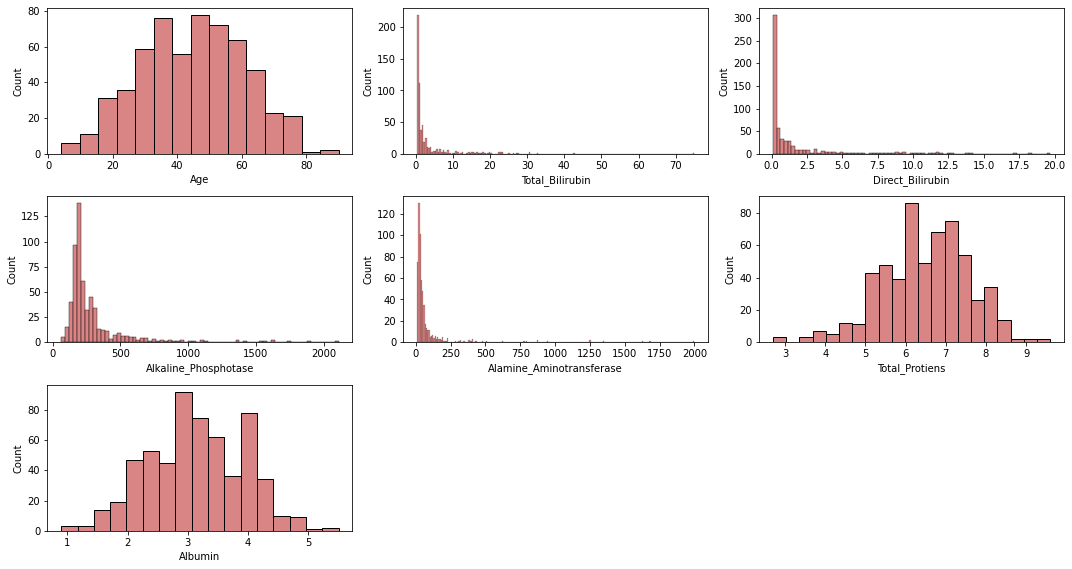

In [23]:
# distribution of data before scaling
import math
plt.figure(figsize=(15, 8))
n_features = len(num_features)
n_cols = 3  # you can change this value to fit your needs
n_rows = math.ceil(n_features / n_cols)
for i, col in enumerate(continuous_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

* No of employees and Copmany age column is skewed
* Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

**Checking Skewness**

**What is Skewness ?**

* Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [24]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

Age                        -0.029385
Total_Bilirubin             4.907474
Direct_Bilirubin            3.212403
Alkaline_Phosphotase        3.765106
Alamine_Aminotransferase    6.549192
Total_Protiens             -0.285672
Albumin                    -0.043685
dtype: float64

- Positiviely Skewed : `Total_Bilirubin`, `Direct_Bilirubin`, `Alkaline_Phosphotase`, `Alamine_Aminotransferase`.
- Some features like `Total_Bilirubin`, `Direct_Bilirubin`, `Alkaline_Phosphotase`, `Alamine_Aminotransferase` are heavily skewed to the right, probably due to outliers. Lets log-normalize these features to improve model performance.

## Apply Log Normalization to Check if it can reduces the outliers

Skewness of log transformed features:
log_Total_Bilirubin :	 1.728075438911167
log_Direct_Bilirubin :	 1.688720802561033
log_Alkaline_Phosphotase :	 1.3310766197312012
log_Alamine_Aminotransferase :	 1.4737740594908915


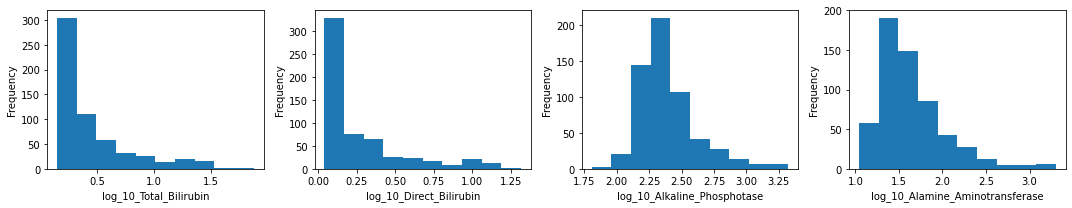

In [25]:
## Adding new log transformed features and visualizing their distributions

skewed_features = ['Total_Bilirubin',\
                   'Direct_Bilirubin', \
                   'Alkaline_Phosphotase', \
                   'Alamine_Aminotransferase']

fig = plt.figure(figsize=(15,3))

print('Skewness of log transformed features:')
for idx, feature in enumerate(skewed_features):
    new_name = f'log_{feature}'
    X[new_name] = np.log10(df[feature]+1) #add 1 to features with 0 values to prevent -np.inf during log transform
    print(new_name, ':\t', X[new_name].skew())

    sub = fig.add_subplot(1,4,idx+1)
    sub.set_xlabel(f'log_10_{feature}')
    X[new_name].plot(kind='hist')
    plt.tight_layout()

In [26]:
X = X.drop(skewed_features, axis = 1)

- Here Yeo-Johnson is used and it supports both positive or negative data for transformation.
- So Power Transformer with yeo-johnson can be used.

In [27]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

Gender : 2


## Feature Encoding and Scaling

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

**Ordinal Encoding for Columns which has many unique categories** 
* Ordinal encoding is used here as label encoder is supported for column transformer.
* Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.

**Standard Scaler** 
* Standardize features by removing the mean and scaling to unit variance.

**Power Transformer**
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

**Selecting number features for preprocessing**

In [28]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [29]:
num_features

['Age',
 'Total_Protiens',
 'Albumin',
 'log_Total_Bilirubin',
 'log_Direct_Bilirubin',
 'log_Alkaline_Phosphotase',
 'log_Alamine_Aminotransferase']

### **Preprocessing using Column Transformer**

In [30]:
# Create Column Transformer with 3 types of transformers
or_columns = ['Gender']
#oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['log_Total_Bilirubin',
 'log_Direct_Bilirubin',
 'log_Alkaline_Phosphotase',
 'log_Alamine_Aminotransferase']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        #("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X

array([[ 0.        , -0.99281638, -1.26701162, ..., -0.78126743,
        -0.49740368, -1.07518908],
       [ 1.        ,  1.66106135,  1.65401972, ...,  1.92628226,
         2.00251224,  0.44396825],
       [ 1.        ,  1.53813723,  1.57021367, ...,  1.55659431,
         1.32813614,  0.37202616],
       ...,
       [ 1.        , -0.7459273 , -0.80172402, ..., -0.64865347,
         0.01391665,  0.12390261],
       [ 1.        ,  0.06441297,  0.06097577, ..., -0.30856061,
        -0.52799308, -0.43182948],
       [ 1.        , -0.35385216, -0.44506595, ..., -0.52666046,
        -0.22460895, -0.7831442 ]])

# Classification

In [33]:
#!pip install --upgrade scikit-learn
# import sklearn
# print(sklearn.__version__)


In [36]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

## Train Test Split
- The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

- It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [37]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((396, 12), (99, 12))

In [38]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [39]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [40]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    #"XGBClassifier": XGBClassifier(), 
     #"CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [41]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## Model Training 

In [42]:
base_model_report =evaluate_models(X=X_res, y=y_res, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9495
- F1 score: 0.9383
- Precision: 0.9268
- Recall: 0.9500
- Roc Auc Score: 0.9496


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8788
- F1 score: 0.8537
- Precision: 0.8333
- Recall: 0.8750
- Roc Auc Score: 0.8782


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9949
- F1 score: 0.9937
- Precision: 1.0000
- Recall: 0.9874
- Roc Auc Score: 0.9937
----------------------------------
Model performance for Test set
- Accuracy: 0.9192
- F1 score: 0.8974
- Precision: 0.9211
- Recall: 0.8750
- Roc Auc Score: 0.9121


Logistic Regression
Model performance for Training 

**Results of All Models**

In [43]:
base_model_report

,Model Name,Accuracy
0,Random Forest,0.949495
4,K-Neighbors Classifier,0.949495
5,Support Vector Classifier,0.929293
2,Gradient Boosting,0.919192
6,AdaBoost Classifier,0.919192
3,Logistic Regression,0.909091
1,Decision Tree,0.878788


**Here we can use Random Forest for Hyper Parameter Tuning**

**Define the parameter distribution for Random forest**

In [44]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

In [45]:
# Models list for Hyperparameter tuning
randomcv_models = [
    #('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [50]:
#params

**Create a function for model training and report which can be used in hyperparameter tuning loop**

In [51]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=10,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=None)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.2s
[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=20, max_features=None, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=20, max_features=None, n_estimators=10; total time=   0.0s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=12, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=15, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=15, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END ...max_depth=15, max_features=log2, n_e

In [52]:
model_param

{'RF': {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 12},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'ball_tree'}}

## Retraining the Model with best Parameters

In [53]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    #"XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9596
- F1 score: 0.9500
- Precision: 0.9500
- Recall: 0.9500
- Roc Auc Score: 0.9581


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9798
- F1 score: 0.9744
- Precision: 1.0000
- Recall: 0.9500
- Roc Auc Score: 0.9750




In [54]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.979798
0,Random Forest Classifier,0.959596


In [55]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9798
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.95      0.97        40

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99



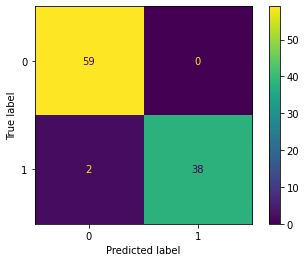

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

## Best Model is K-Nearest Neighbor(KNN) with Accuracy 96.66%